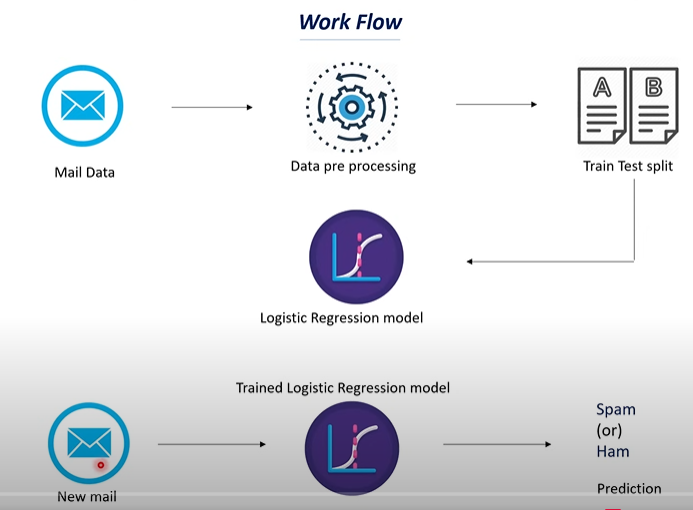

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Pre-Processing

In [2]:
raw_mail_data = pd.read_csv('mail_data.csv')

In [3]:
raw_mail_data.shape

(5572, 2)

In [4]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
# replace null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [6]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
mail_data.shape

(5572, 2)

Label Encoding

In [8]:
# label spam mail as 0 & ham mail as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

Separating Data as Texts & Label

In [9]:
X = mail_data['Message']
Y = mail_data['Category']

In [10]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [11]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into Training & Test Data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(5572,) (4457,) (1115,)


Feature Extraction

In [17]:
#transform text data to feature vectors that can be used as input to Logistic Regression
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y into integer values
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [18]:
print(X_train_features)

  (0, 6927)	0.48935591439341625
  (0, 6586)	0.44333254982109394
  (0, 3958)	0.6161071828926097
  (0, 4334)	0.42941702167641554
  (1, 3168)	0.5869421390016224
  (1, 6971)	0.4281243465155688
  (1, 1428)	0.5869421390016224
  (1, 2121)	0.35736171430221464
  (2, 6878)	0.35749230587184955
  (2, 1876)	0.28751725124107325
  (2, 5894)	0.35749230587184955
  (2, 806)	0.26730249393705324
  (2, 5695)	0.35749230587184955
  (2, 4884)	0.35749230587184955
  (2, 3852)	0.3408491178137899
  (2, 7353)	0.31988118061968496
  (2, 5115)	0.3408491178137899
  (3, 1876)	0.3080768784015236
  (3, 7297)	0.22192369472149484
  (3, 7000)	0.30072945056088285
  (3, 7065)	0.32795623716393424
  (3, 2060)	0.24915048132454623
  (3, 5005)	0.3169028431039865
  (3, 7248)	0.23571908490908416
  (3, 300)	0.2915969875465198
  :	:
  (4454, 4627)	0.3831814754124698
  (4454, 311)	0.19547195974237946
  (4454, 5068)	0.22284357632450164
  (4454, 1094)	0.24862733340971144
  (4454, 1575)	0.20946314330145205
  (4454, 666)	0.2865366032423894

Training the Model using Logistic Regression

In [19]:
model = LogisticRegression()

In [20]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Model Evaluation

In [21]:
# prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9685887368184878


In [22]:
# prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9533632286995516


Building a Predictive System

In [23]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
